In [4]:
import os
import glob
import torch
import numpy as np

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

import config
import dataset

In [12]:
image_files = glob.glob(os.path.join(config.DATA_DIR, "*.png"))
# "/../../azopekr.png"
targets_orig = [x.split("/")[-1][:4] for x in image_files]
# abcde -> [a, b, c, d, e]
"""
targets 
['6', 'd', 'm', 'x'],
['c', '7', '5', '3'],
['g', 'g', 'd', '7'],
['x', 'e', 'm', 'y'],
['6', 'g', '4', '5'],
['p', '2', 'x', '7'],
['d', 'y', 'p', '7'],
['6', 'e', 'c', 'b'],
['3', 'm', 'x', 'd'],
['f', 'c', 'm', 'e'],
['8', 'n', '6', '2'],
"""
targets = [[c for c in x] for x in targets_orig]
"""
targets_flat
['e',
 '2',
 'd',
 '6',
 'f',
 'w',
 '3',
 'b',
 'n',
 ...
]
"""
targets_flat = [c for clist in targets for c in clist]

lbl_enc = preprocessing.LabelEncoder()
lbl_enc.fit(targets_flat)
targets_enc = [lbl_enc.transform(x) for x in targets]
# I added one because 0 is kept for unknown 
targets_enc = np.array(targets_enc) + 1
train_imgs, test_imgs, train_targets, test_targets, train_orig_targets, test_orig_targets = model_selection.train_test_split(
    image_files, targets_enc, targets_orig, test_size=0.1, random_state=42
)

train_dataset = dataset.ClassificationDataset(
    image_paths=train_imgs, 
    targets=train_targets, 
    resize=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH)
)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=config.BATCH_SIZE,
    num_workers=config.NUM_WORKERS,
    shuffle=True
)

In [13]:
npimg = train_dataset[0]["images"].numpy()

In [14]:
npimg.shape

(3, 75, 300)

In [15]:
# do the inverse of what I did in the dataloader 
# (H, W, Channels)
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(75, 300, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


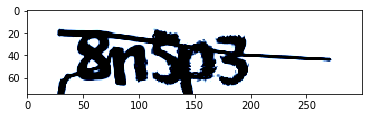

In [16]:
plt.imshow(npimg)